In [3]:
# Q :- Explore Original Data (before data cleaning),Import library needed.,Read CSV.,View data info.
#Columns = 25,Rows = 30,000,No null value, View data sample

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("UCI_Credit_Card - UCI_Credit_Card.csv")

In [6]:
# Step 6: View a sample of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# Step 3: View data info
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2           

In [8]:
# Step 4: Check the shape of the data
df.shape

(30000, 25)

In [9]:
# Step 5: Check for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
#Check unique value of each categorical variable for 'SEX','EDUCATION','MARRIAGE','PAY_0','default.payment.next.month'

In [12]:
# Check unique values for each categorical variable
categorical_columns = ['SEX','EDUCATION','MARRIAGE','PAY_0','default.payment.next.month']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")


Unique values for SEX: [2 1]

Unique values for EDUCATION: [2 1 3 5 4 6 0]

Unique values for MARRIAGE: [1 2 3 0]

Unique values for PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]

Unique values for default.payment.next.month: [1 0]



In [13]:
# Step 1: Display unique values before cleaning
print("Unique values in EDUCATION before cleaning:")
print(df['EDUCATION'].unique())

# Step 2: Replace specified values
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 4: 4, 5: 4, 6: 4})

# Step 3: Display unique values after cleaning
print("\nUnique values in EDUCATION after cleaning:")
print(df['EDUCATION'].unique())


Unique values in EDUCATION before cleaning:
[2 1 3 5 4 6 0]

Unique values in EDUCATION after cleaning:
[2 1 3 4]


In [14]:
# Column name 'default.payment.next.month' is better to name it 'DEFAULT'.
# Column name 'PAY_0' would be better to name it 'PAY_1', to make it consistent with 'BILL_AMT1' and 'PAY_AMT1'.

In [15]:
df=df.rename(columns={'default.payment.next.month':'Default','PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
# Explore Data with Visualization
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


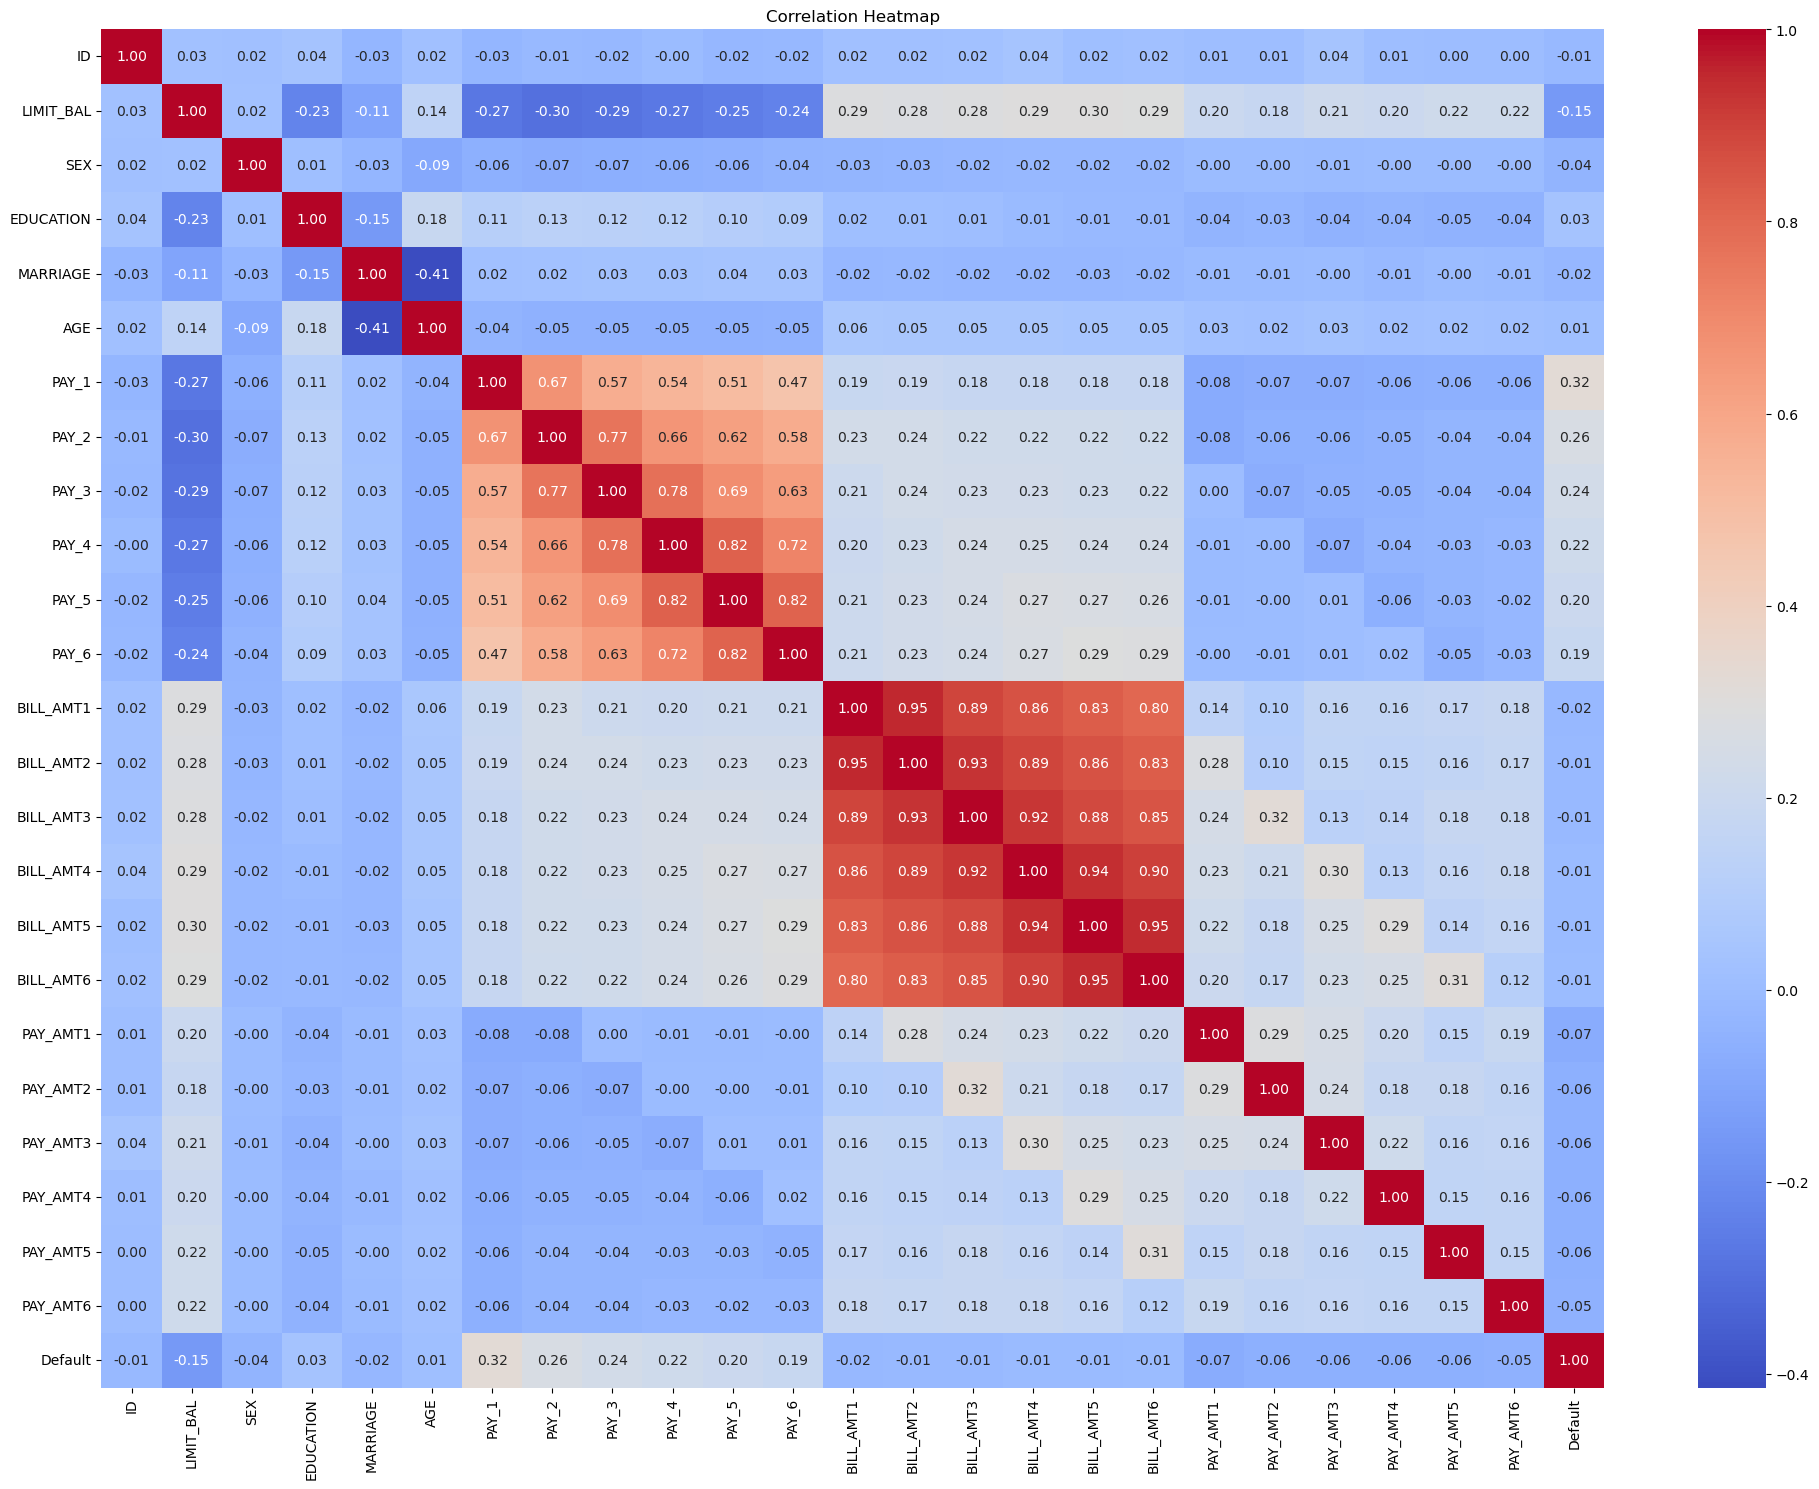

     Variable  Correlation with DEFAULT
0          ID                 -0.013952
1   LIMIT_BAL                 -0.153520
2         SEX                 -0.039961
3   EDUCATION                  0.033842
4    MARRIAGE                 -0.024339
5         AGE                  0.013890
6       PAY_1                  0.324794
7       PAY_2                  0.263551
8       PAY_3                  0.235253
9       PAY_4                  0.216614
10      PAY_5                  0.204149
11      PAY_6                  0.186866
12  BILL_AMT1                 -0.019644
13  BILL_AMT2                 -0.014193
14  BILL_AMT3                 -0.014076
15  BILL_AMT4                 -0.010156
16  BILL_AMT5                 -0.006760
17  BILL_AMT6                 -0.005372
18   PAY_AMT1                 -0.072929
19   PAY_AMT2                 -0.058579
20   PAY_AMT3                 -0.056250
21   PAY_AMT4                 -0.056827
22   PAY_AMT5                 -0.055124
23   PAY_AMT6                 -0.053183


In [17]:
# Visualize with Heatmap.Look at DEFAULT correlation with other variables.

correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()  
plt.show()  

default_correlation = correlation_matrix['Default']
default_correlation_df = default_correlation.reset_index()
default_correlation_df.columns = ['Variable', 'Correlation with DEFAULT']
print(default_correlation_df)

In [18]:
# Visualize Categorical Data with Barchart
# Explore Education vs. Default

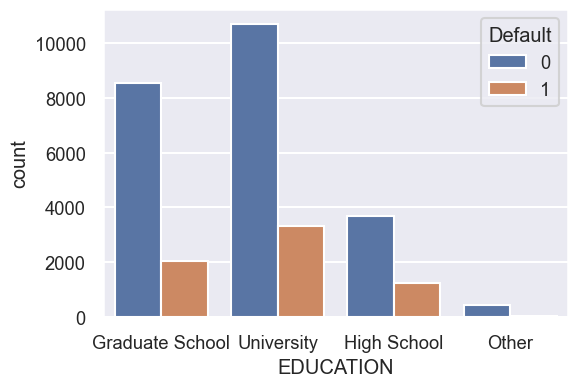

In [19]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='Default', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [20]:
default0 = df.groupby(df['EDUCATION'][df['Default'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['EDUCATION'][df['Default'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']

eduTable

,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Graduate School,8549,2036,10585
1,University,10700,3330,14030
2,High School,3680,1237,4917
3,Other,435,33,468


In [21]:
df.groupby(df["EDUCATION"][df["Default"]==0]).size().reset_index(name='Not_Default')

,EDUCATION,Not_Default
0,1.0,8549
1,2.0,10700
2,3.0,3680
3,4.0,435


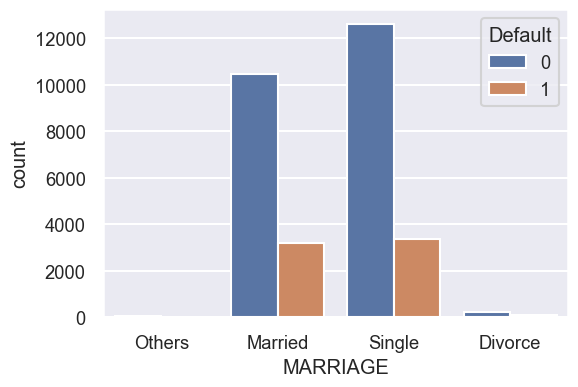

In [22]:
# Explore Marriage vs. Default
sns.set(rc={'figure.figsize':(6,4)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='Default', data=df )
marri.set_xticklabels(['Others','Married','Single','Divorce'])
plt.show()

In [23]:
default0 = df.groupby(df['MARRIAGE'][df['Default'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['Default'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorce,239,84,323


In [24]:
#Visualize Numerical Data with Histogram

In [25]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<Axes: xlabel='AGE'>

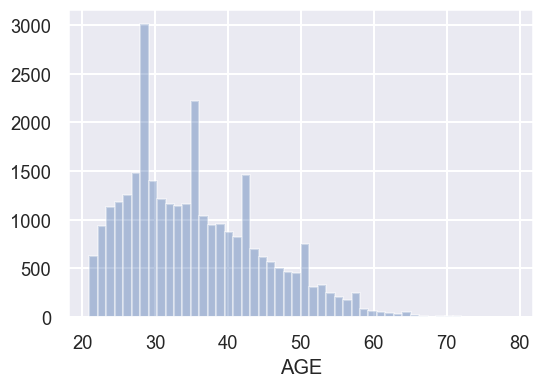

In [26]:
sns.distplot(df['AGE'], norm_hist=False, kde=False)

<Axes: title={'center': 'Defaulted Client'}, xlabel='AGE'>

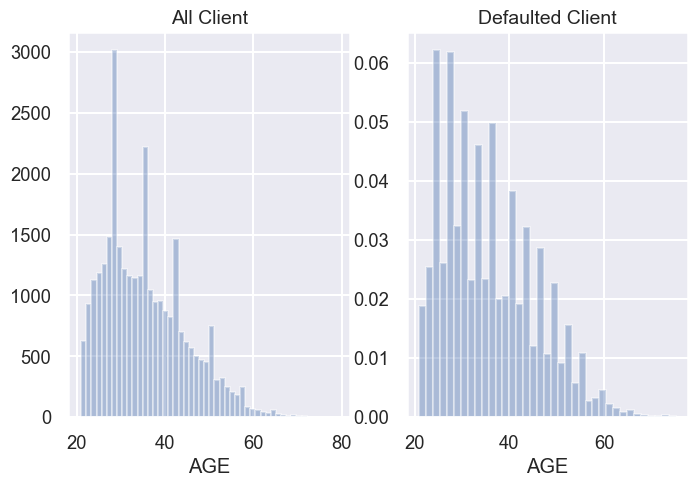

In [27]:
#Compare All Client vs. Defaulted Client
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,5))

ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)

sns.distplot(df['AGE'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['AGE'][df['Default'] == 1], norm_hist=True, kde=False, ax=ax2)